# VLM Usage - CLIP
- (Image, Text) Contrastive Learning Joint embedding

CLIP (Contrastive Language-Image Pre-training) is a neural network model developed by OpenAI that embeds text and images into a shared vector space, allowing for cross-modal search, zero-shot image classification, and other multimodal applications.

Here's a simplified overview of how CLIP works:

![image.png](https://i.ibb.co/6bw0cf5/workshop3-3-clip.png)

**Text Embedding**:
- Text input (e.g., a sentence or phrase) is tokenized into subwords (smaller units of text).
- The tokenized text is fed into a transformer encoder (a type of neural network architecture).
- The transformer encoder generates a text embedding, a numerical representation of the text.

**Image Embedding**:
- Image input (e.g., a picture) is resized and normalized.
- The image is fed into ViT (Vision Tranformer), thus generates an image embedding, a numerical representation of the image.

**Shared Vector Space**:
- CLIP uses a contrastive learning approach to align the text and image embeddings in a shared vector space.
- The model is trained on a large dataset of image-text pairs, such as images with captions.
- The goal is to maximize the similarity between the text and image embeddings for matching pairs, while minimizing the similarity for non-matching pairs.


![image.png](https://i.ibb.co/FJwypVs/workshop-3-clip-embed.png)
*Adapted from https://www.pinecone.io/learn/series/image-search/zero-shot-object-detection-clip/ *

**Usage**:
- Once trained, CLIP embed text and images into the shared vector space.
- This allows
    - Zero-shot image classification
    - Cross-modal search
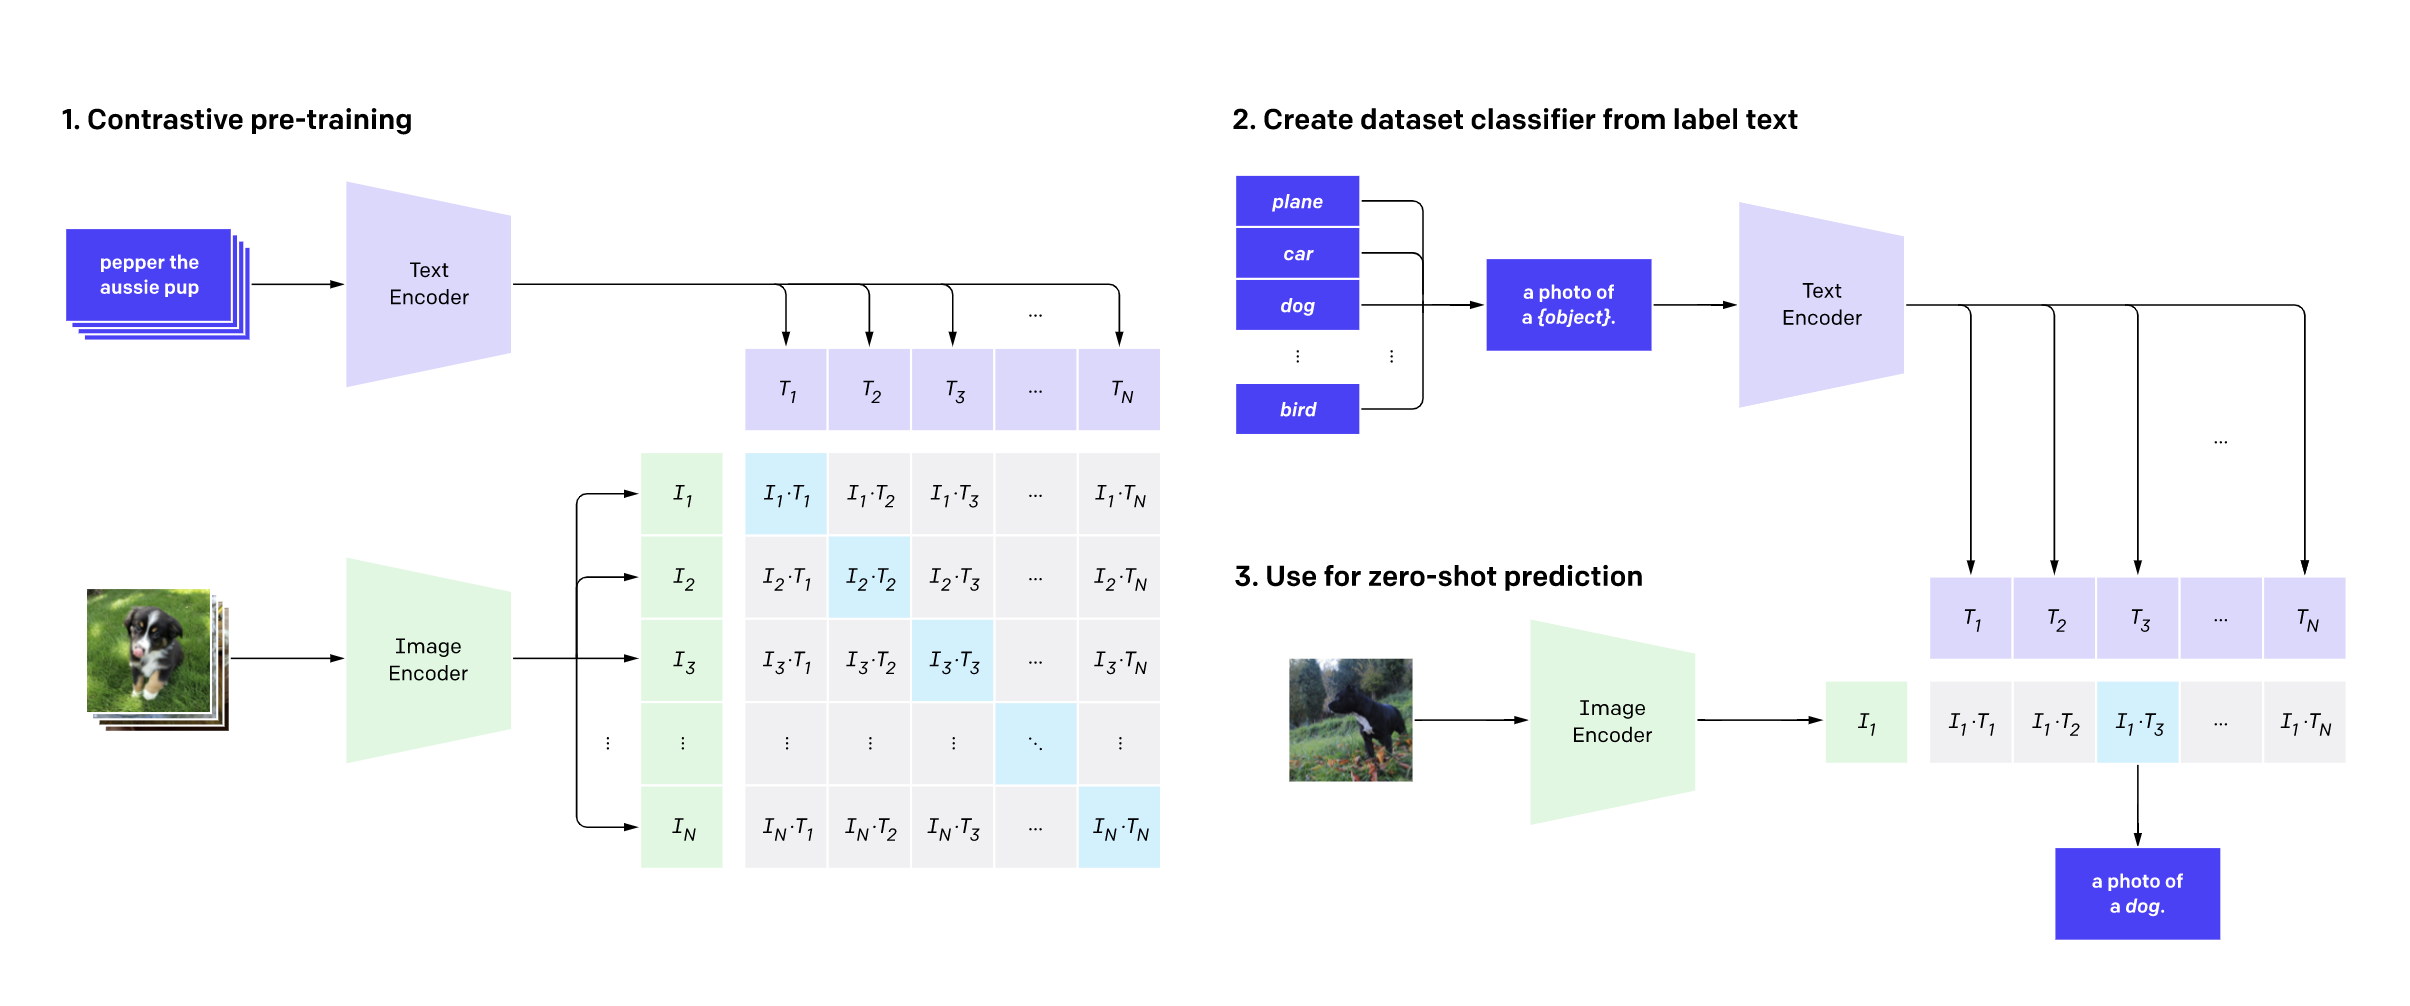

# Via pretrained model

In [32]:
from PIL import Image
import torch
import requests
from transformers import CLIPProcessor, CLIPModel
from matplotlib import pyplot as plt
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

We initialize the model from HuggingFace. Note that the `processor` includes both the tokenizer and the image processor, which would normally be separate.

In [117]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
# there is a larger/more comprehensive model - openai/clip-vit-large-patch14, that should have better performance, but also require more compute
model.to(device)
print("load!")

load!


To demonstrate the model, we download and display an image of cats from the COCO dataset.

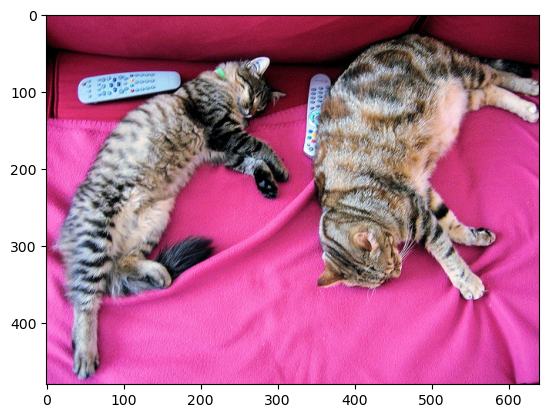

In [118]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)
plt.show()

Now we can take this image along with some possible captions, pass it through the processor, and get back the label probabilities from CLIP.

In [125]:
inputs = processor(
    text=["a photo of a cat", "a photo of a dog"],
    images=image,
    return_tensors="pt",
    padding=True,
)
inputs.to(device)
with torch.no_grad():
    outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(
    dim=1
)  # we can take the softmax to get the label probabilities
for prob, label in zip(probs[0], ("cat", "dog")):
    print(f"{label}: {prob: .3f}")

cat:  0.629
dog:  0.371


The code above loads the CLIP model and processor, downloads an image of a cat, and runs the image through the model with two different text prompts: "a photo of a cat" and "a photo of a dog". The model outputs a similarity score for each prompt, which is then converted to a probability using softmax. The probabilities are printed out for each label. 

In this case, the model correctly identifies the image as a cat with a higher probability compared to a dog.

# Exercise (10 mins)

**1. Modifying the query text & label in the last cell**
- Modify the prompt in the last cell to query for "cat's tail" instead of "cat"
- What if you query via random text/vague description?
- Observe how the result changes:
- Does the model detect the cat's tail accurately?
- How does the confidence score change?



**2. Classifying Non-Common Objects**

Load images from the imgs directory and query it with text, Does clip works?

Weblinks for images
- hot air balloon : https://i.ibb.co/RBgthgt/hot-air-balloon.jpg"
- beach-chair : "https://i.ibb.co/prG3Ctt/beach-chair.jpg"
- horserider : "https://i.ibb.co/r4Zfg15/horserider.jpg"

**What to Reflect On:**
- How does the model's performance change when querying for a specific part of an object (cat's tail)?
- How does the model generalize to non-common objects and unseen data?
- What are the limitations and potential biases of the model?

## Resources:
1. [HF CLIP Usage](https://huggingface.co/docs/transformers/en/model_doc/clip#usage-tips-and-example)
2. [OpenAI CLIP](https://openai.com/index/clip/)
3. [Pinecone OD Clip](https://www.pinecone.io/learn/series/image-search/zero-shot-object-detection-clip/)